In [1]:
from typing import List 
import random 
import numpy as np 
import pandas as pd
import glob 
from nltk import tokenize, download 
import string 
import time 
from collections import Counter 
import seaborn as sns 
import matplotlib.pyplot as plt 
import nltk
from nltk.stem.porter import PorterStemmer

download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#Splitting text and cleaning

def split_text(filepath: str, min_char: int = 5) -> List[str]:
    
    text = str()
    with open(filepath, 'r', encoding='utf8') as file:
        
        # this seperates by line 
        text = file.read().replace('\n', '. ')
        
        # this replace multiple characters 
        text = text.replace('.”', '”.').replace('."', '".').replace('?”', '”?').replace('!”', '”!')
        text = text.replace('--', ' ').replace('. . .', '').replace('_', '')
    
    sentences = tokenize.sent_tokenize(text)    
    sentences = [sentence for sentence in sentences if len(sentence) >= min_char]

    return list(sentences)

In [3]:
# reading the files 

Fevre_Dream = []
for path_1 in glob.glob('Fevre_Dream.txt'):
    Fevre_Dream.extend(split_text(path_1))

The_Hedge_Knight = []
for path_2 in glob.glob('The_Hedge_Knight.txt'):
    The_Hedge_Knight.extend(split_text(path_2))
    
Fire_and_Blood = []
for path_3 in glob.glob('Fire_and_Blood.txt'):
    Fire_and_Blood.extend(split_text(path_3))
    
A_Game_of_Thrones = []
for path_4 in glob.glob('A_Game_of_Thrones_1.txt'):
    A_Game_of_Thrones.extend(split_text(path_4))
                
A_Clash_of_Kings = []
for path_5 in glob.glob('A_Clash_of_Kings_2.txt'):
    A_Clash_of_Kings.extend(split_text(path_5))
    
A_Storm_Of_Swords = []
for path_6 in glob.glob('A_Storm_Of_Swords_3.txt'):
    A_Storm_Of_Swords.extend(split_text(path_6))
    
A_Feast_for_Crows = []
for path_7 in glob.glob('A_Feast_for_Crows_4.txt'):
    A_Feast_for_Crows.extend(split_text(path_7))
    
A_dance_with_Dragons = []
for path_8 in glob.glob('A_dance_with_Dragons_5.txt'):
    A_dance_with_Dragons.extend(split_text(path_8))
    
The_Winds_of_Winter = []
for path_9 in glob.glob('The_Winds_of_Winter.txt'):
    The_Winds_of_Winter.extend(split_text(path_9))

In [4]:

text_dictionary = {
    'Fevre_Dream': Fevre_Dream,
    'The_Hedge_Knight': The_Hedge_Knight,
    'Fire_and_Blood': Fire_and_Blood,
    'A_Game_of_Thrones_1': A_Game_of_Thrones ,
    'A_Clash_of_Kings_2': A_Clash_of_Kings,
    'A_Storm_Of_Swords_3': A_Storm_Of_Swords,
    'A_Feast_for_Crows_4': A_Feast_for_Crows,
    'A_dance_with_Dragons_5': A_dance_with_Dragons,
    'The_Winds_of_Winter': The_Winds_of_Winter
}

for key in text_dictionary.keys(): 
    print(key, ':', len(text_dictionary[key]), 'sentences')


Fevre_Dream : 17400 sentences
The_Hedge_Knight : 3440 sentences
Fire_and_Blood : 28794 sentences
A_Game_of_Thrones_1 : 32956 sentences
A_Clash_of_Kings_2 : 36033 sentences
A_Storm_Of_Swords_3 : 46716 sentences
A_Feast_for_Crows_4 : 33554 sentences
A_dance_with_Dragons_5 : 46955 sentences
The_Winds_of_Winter : 6228 sentences


In [5]:
np.random.seed(1) 

max_len = 100000 

names = [Fevre_Dream, The_Hedge_Knight, Fire_and_Blood, A_Game_of_Thrones, 
         A_Clash_of_Kings, A_Storm_Of_Swords, A_Feast_for_Crows, A_dance_with_Dragons, The_Winds_of_Winter] 

combined = []

for name in names: 
    name = np.random.choice(name, max_len, replace= True) 
    combined += list(name) 
    
print('Length of combined and internally shuffled list:', len(combined))

Length of combined and internally shuffled list: 900000


In [6]:
# Creating a marked list 
# Creating the label of the books 

labels = (['FD'] * max_len + ['HK'] * max_len + ['FB'] * max_len + 
          ['GT'] * max_len + ['CK'] * max_len + ['SS'] * max_len  + 
          ['FC'] * max_len + ['DD'] * max_len + ['WW'] * max_len)

print('Length of marked list:', len(labels))

Length of marked list: 900000


In [7]:
# lets see if every sentence has a label 
len(combined) == len(labels)

True

In [8]:
# shuffling the data - sentences 
random.seed(3) 

zipped = list(zip(combined, labels))

random.shuffle(zipped)

combined, labels = zip(*zipped)

In [9]:
# exporting the resulting dataset 
output_data = pd.DataFrame()
output_data['text'] = combined
output_data['book'] = labels

In [10]:
print(output_data.head())
print(output_data.tail())

                                                text book
0  nonce, all she could do was tell the merchants...   FC
1        The hard truths are the ones to hold tight.   GT
2  In the fierce heat of the south, he wore loose...   GT
3                       most of it had gone already.   WW
4                            Julian broke away from.   FD
                                                     text book
899995                           “It is not my intent to.   GT
899996  of the meadow, as distant from Ser Otho as the...   HK
899997                                  “Some thought so.   SS
899998                     The younger rose to greet her.   FC
899999  Wall in hopes of making common cause with the ...   FB


In [11]:
output_data.to_csv('GRR_Martins_data.csv', index=False)
data = pd.read_csv('GRR_Martins_data.csv', encoding='utf8')
data.head()

text book
0  nonce, all she could do was tell the merchants...   FC
1        The hard truths are the ones to hold tight.   GT
2  In the fierce heat of the south, he wore loose...   GT
3                       most of it had gone already.   WW
4                            Julian broke away from.   FD

In [12]:
import re
from nltk.tokenize import word_tokenize
# Clean and tokenize the text
def clean_text(text):
    text = text.lower()  # lowercase
    text = text.replace("[", '')
    text = text.replace("]", '')
    text = re.sub(r'[^\w\s]', ' ', text)  # leave only word characters and spaces
    text = re.sub(r'\s+', ' ', text)  # omit extra space characters
    text = re.sub(r'\d+', '', text)  # remove digits
    text = text.strip()
    return text

# Apply the cleaning function
data['text'] = data['text'].apply(clean_text)

# Display the first few entries
data.head()

text book
0  nonce all she could do was tell the merchants ...   FC
1         the hard truths are the ones to hold tight   GT
2  in the fierce heat of the south he wore loose ...   GT
3                        most of it had gone already   WW
4                             julian broke away from   FD

In [13]:
# Label encoding the values 
data_label_encoded = pd.DataFrame() 
data_label_encoded = data.copy(deep=True)

from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
data_label_encoded['book'] = label_encoder.fit_transform(data_label_encoded['book'])
data_label_encoded.head()

text  book
0  nonce all she could do was tell the merchants ...     3
1         the hard truths are the ones to hold tight     5
2  in the fierce heat of the south he wore loose ...     5
3                        most of it had gone already     8
4                             julian broke away from     4

In [14]:
data_label_encoded.describe()

book
count  900000.00000
mean        4.00000
std         2.58199
min         0.00000
25%         2.00000
50%         4.00000
75%         6.00000
max         8.00000

In [15]:
plt.style.use('ggplot')
import re
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('wordnet', '/root/nltk_data/')
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
'unzip' is not recognized as an internal or external command,
operable program or batch file.


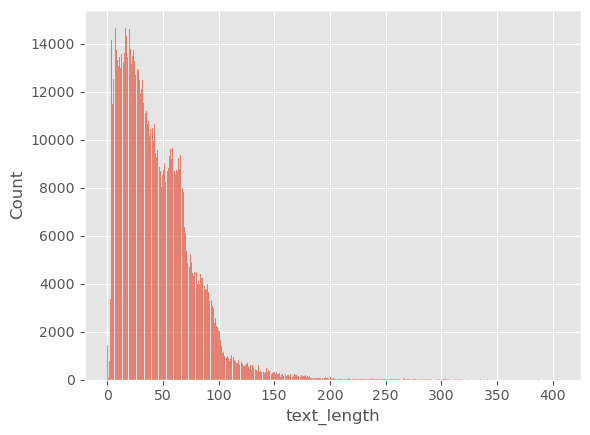

In [16]:
# Create a new column for message length
data['text_length'] = data['text'].apply(len)

# Visualize the distribution of message lengths
sns.histplot(data['text_length'])
plt.show()

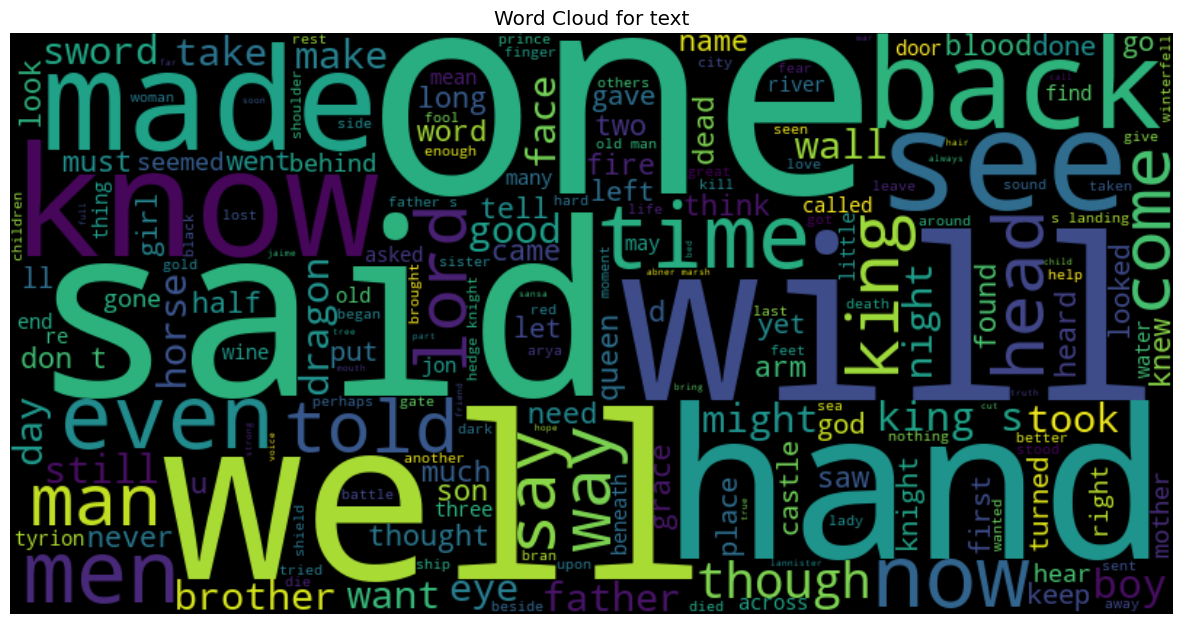

In [17]:
from wordcloud import WordCloud

# Create a word cloud for messages
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(data['text']))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for text')
plt.show()

In [18]:

# Define a function for preprocessing text
def preprocess_text(text):
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing to each text entry in the dataset
data['text'] = data['text'].apply(preprocess_text)


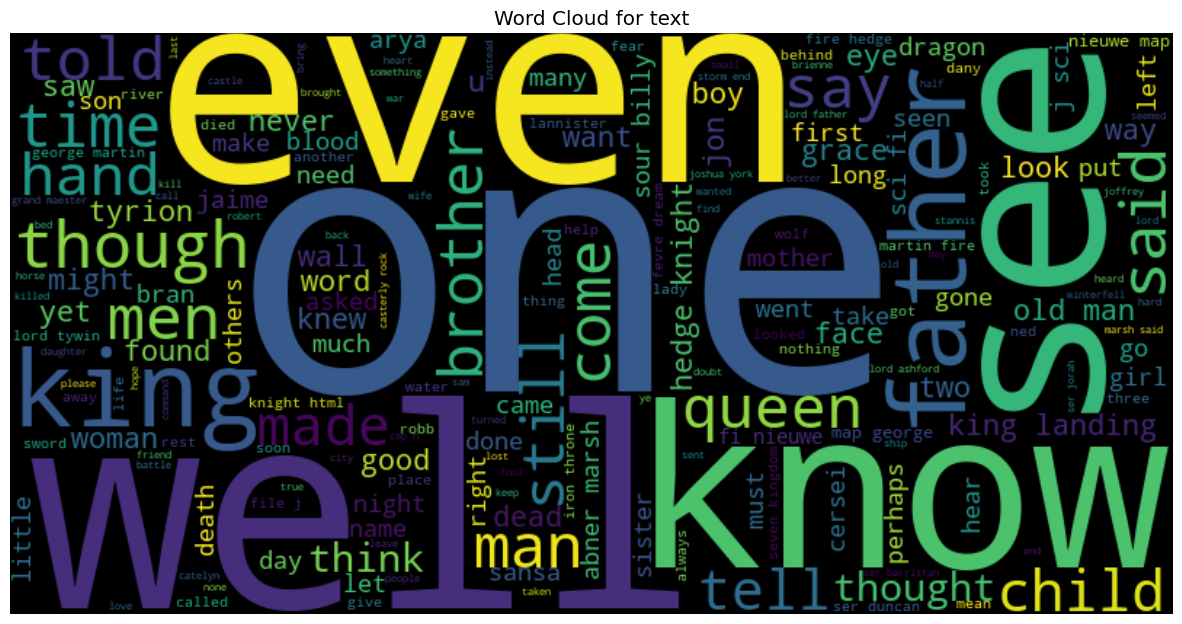

In [19]:

# Create a word cloud for messages
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(data['text']))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for text')
plt.show()

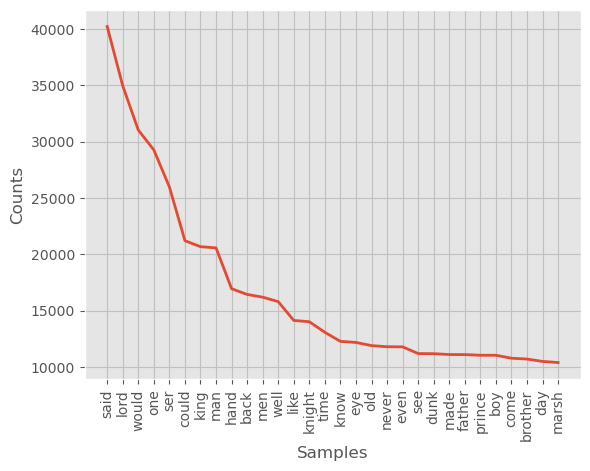

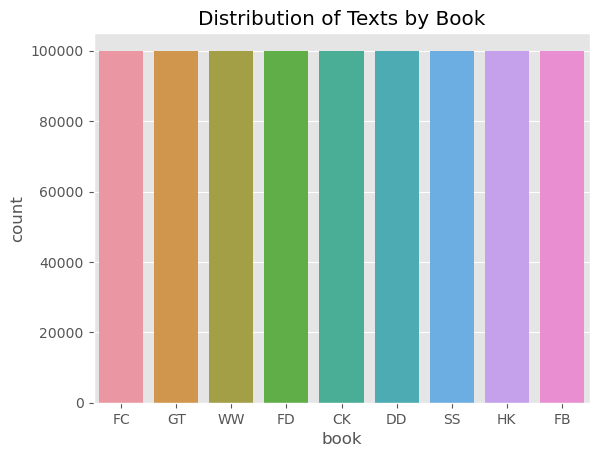

In [20]:
# Word frequency distribution
all_words = ' '.join(data['text']).split()
freq_dist = nltk.FreqDist(all_words)
freq_dist.plot(30, cumulative=False)

# Book distribution
sns.countplot(x='book', data=data)
plt.title('Distribution of Texts by Book')
plt.show()


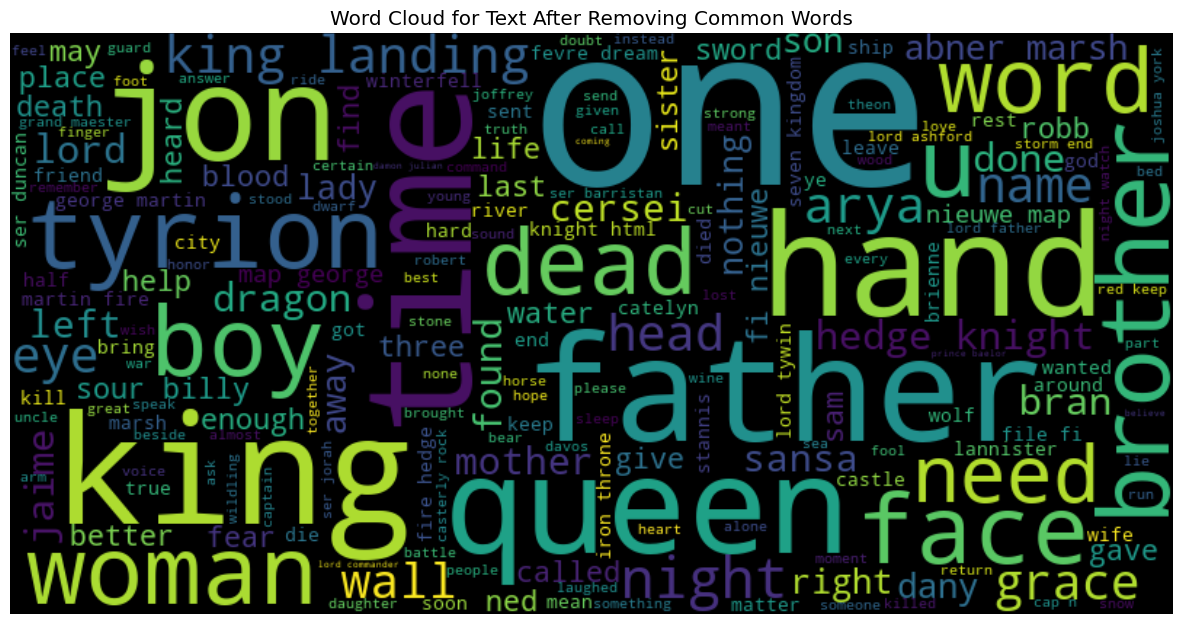

In [21]:
# Extend the stop word list
custom_stop_words = ['let', 'know', 'said', 'cook', 'though', 'made', 'will', 'see', 'come', 'go', 'think', 
    'look', 'want', 'back', 'get', 'asked', 'talk', 'take', 'girl', 'hear', 'well', 'yet', 
    'day', 'never', 'saw', 'perhaps', 'put', 'thing', 'always', 'man', 'even', 'told', 
    'say', 'make', 'must', 'first', 'turned', 'men', 'still', 'good', 'child', 'seemed', 
    'two', 'another', 'behind', 'others', 'tell', 'going', 'new', 'old', 'way', 'looked', 
    'came', 'thought', 'went', 'taken', 'says', 'making', 'gets', 'getting', 'sees', 'seems', 
    'wants', 'talking', 'tells', 'thinks', 'look', 'looking', 'putting', 'asking', 'having', 
    'doing', 'comes', 'going', 'giving', 'takes', 'took', 'gone', 'knew', 'known', 'knows', 
    'seen', 'without', 'within', 'across', 'among', 'between', 'high', 'low', 'big', 'small', 
    'long', 'short', 'little', 'less', 'many', 'much', 'more', 'most', 'other', 'some', 'such', 
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 
    'don', 'should', 'now', 'j', 'sci', 'sci fi', 'might']
stop_words = set(stopwords.words('english')) | set(custom_stop_words)

# Update the preprocessing function to use the extended stop words list
def preprocess_text(text, stop_words=stop_words):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Reapply preprocessing to each text entry in the dataset
data['text'] = data['text'].apply(preprocess_text)

# Regenerate the word cloud with updated text
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(data['text']))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text After Removing Common Words')
plt.show()

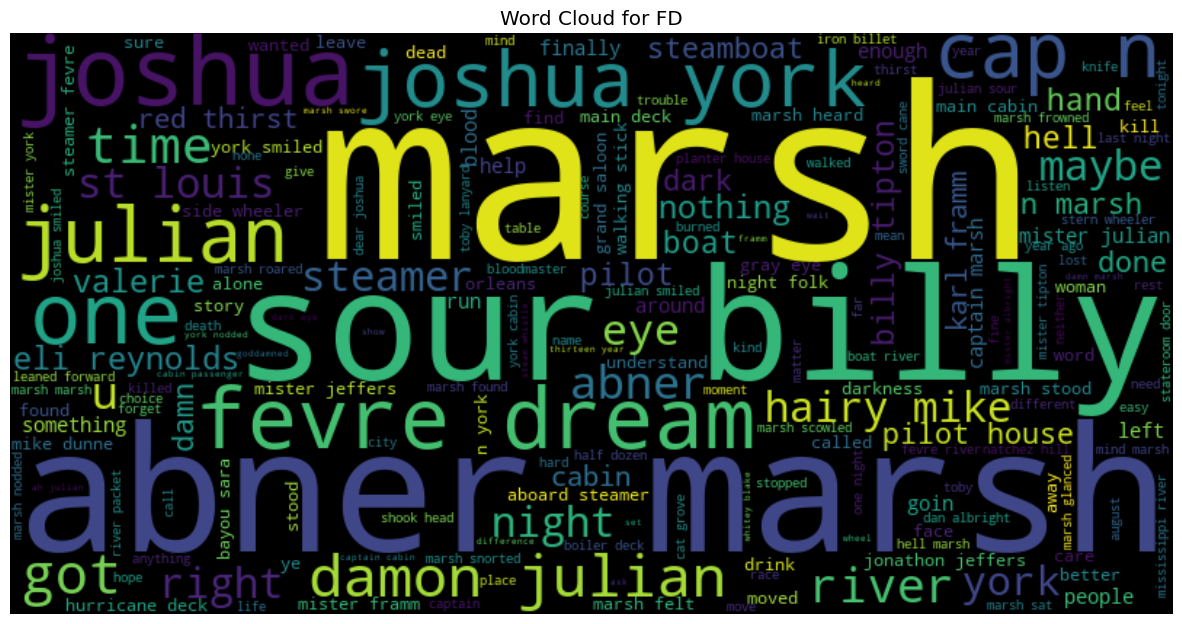

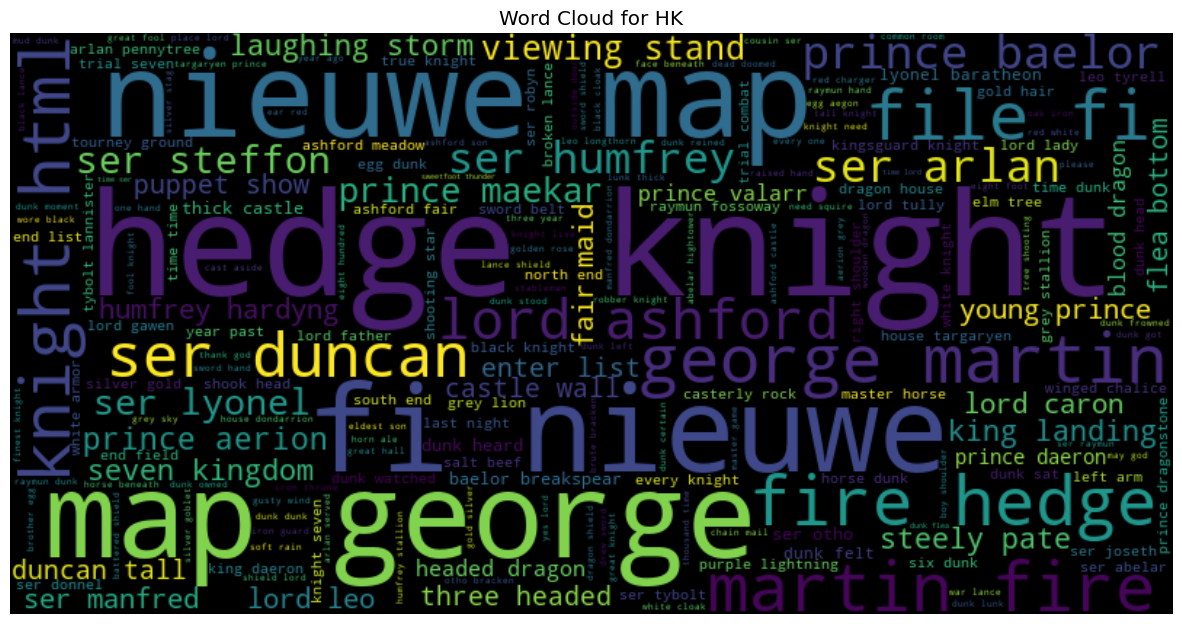

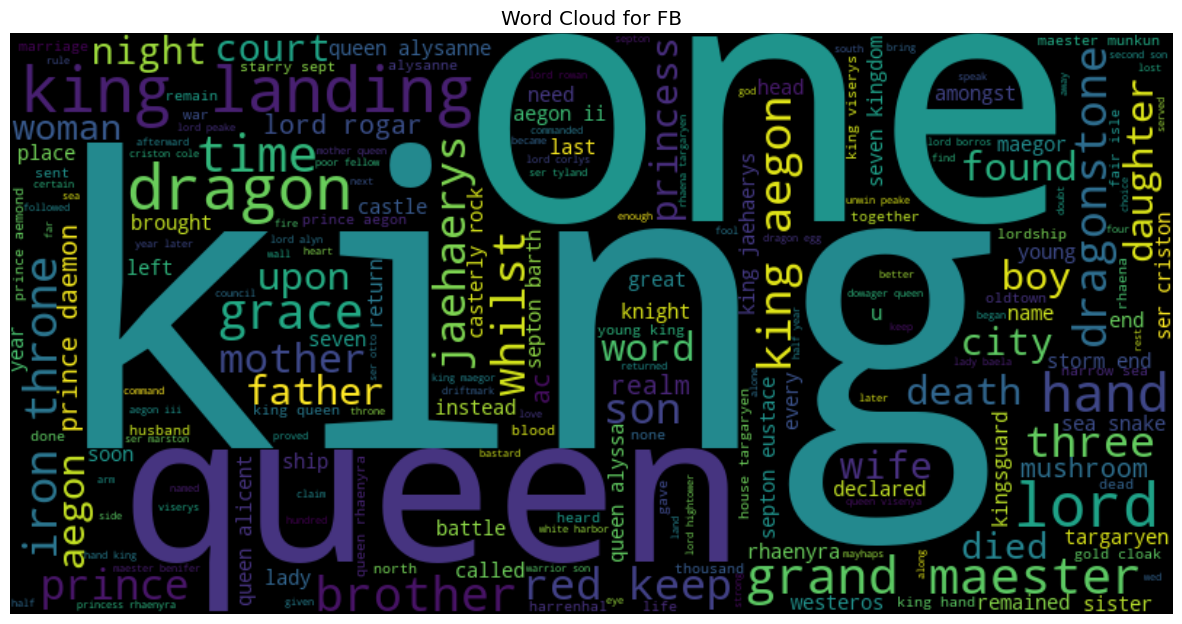

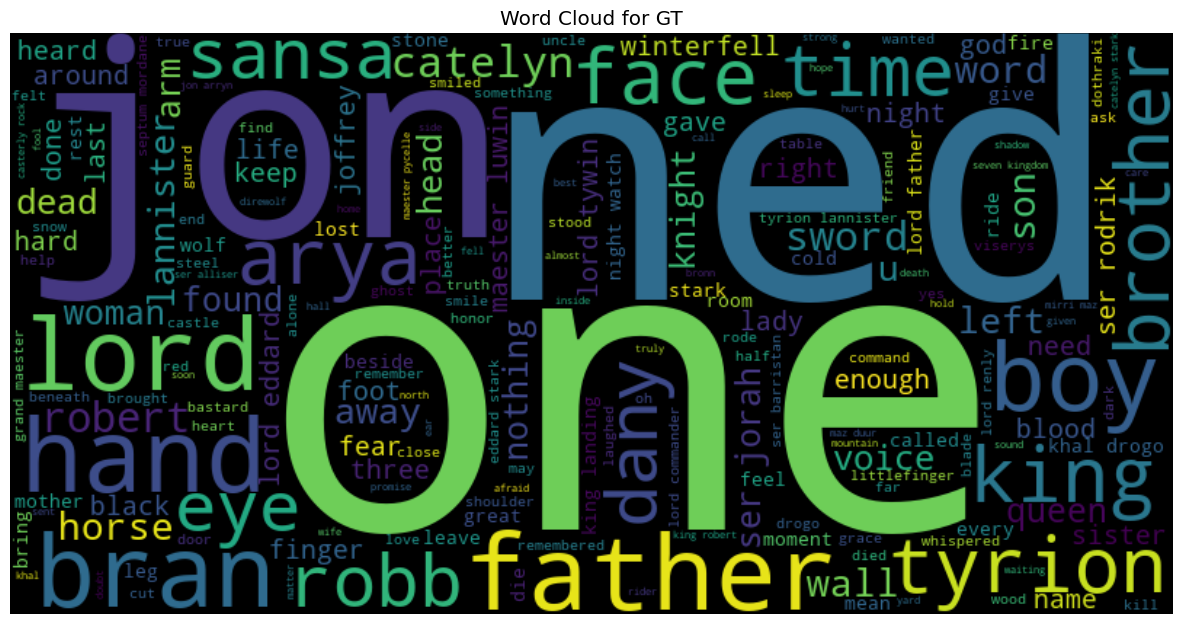

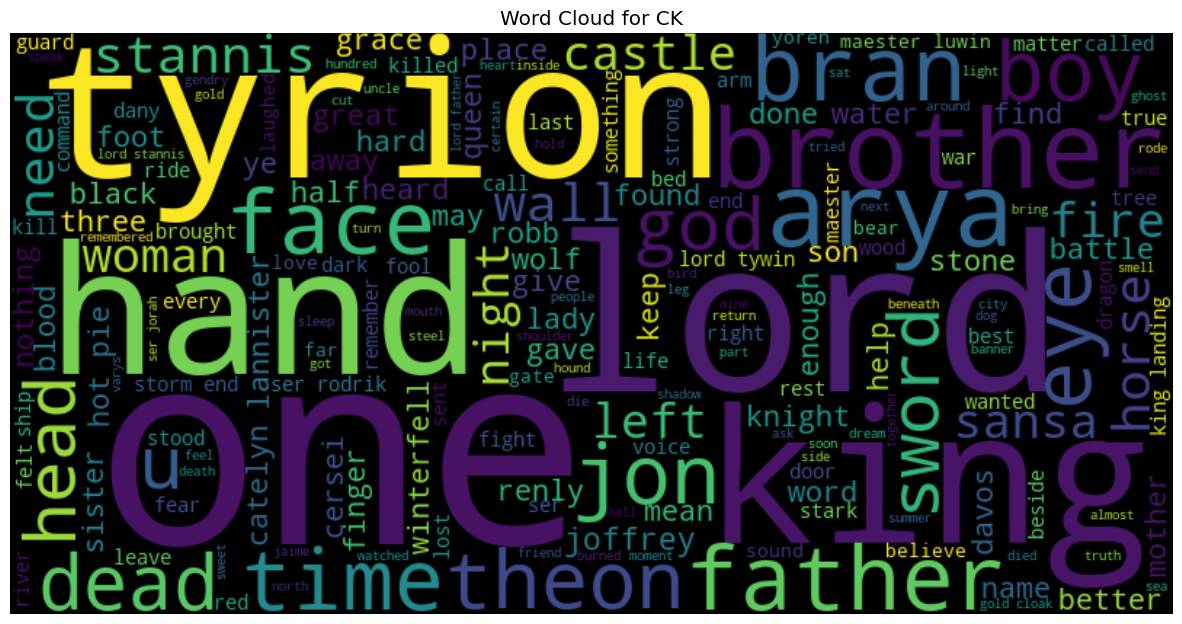

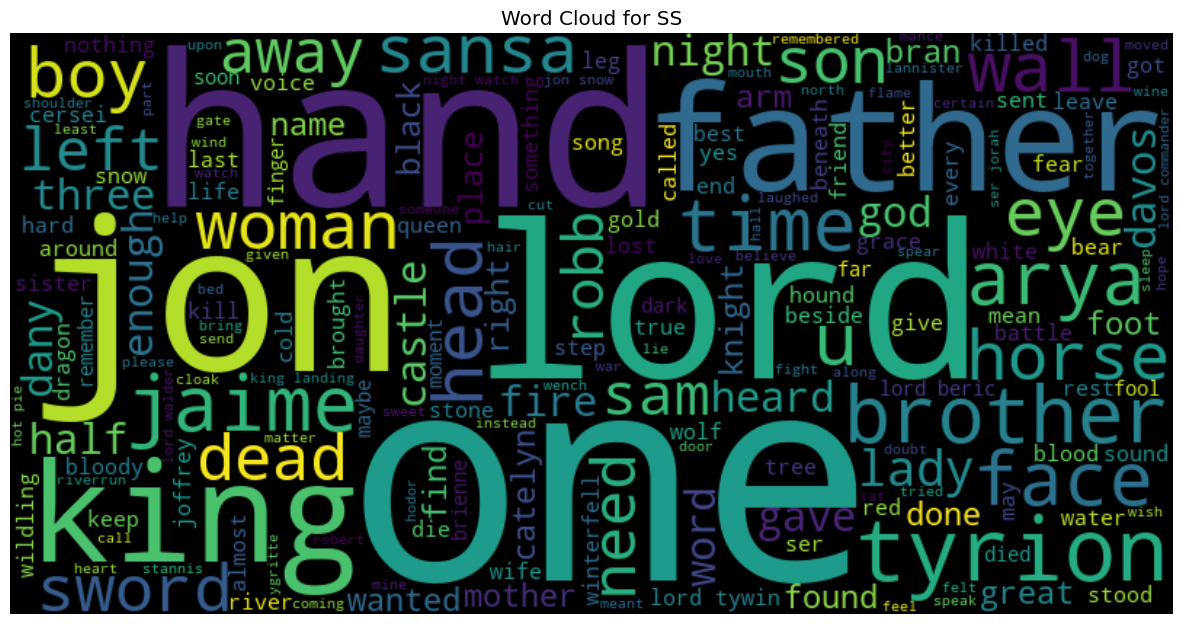

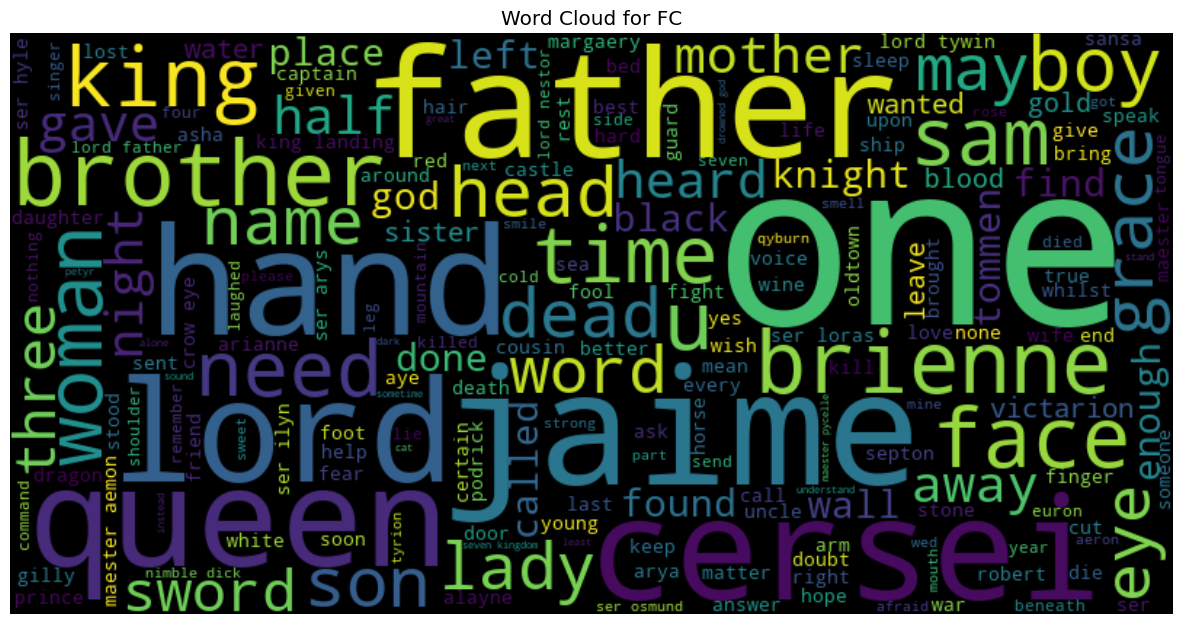

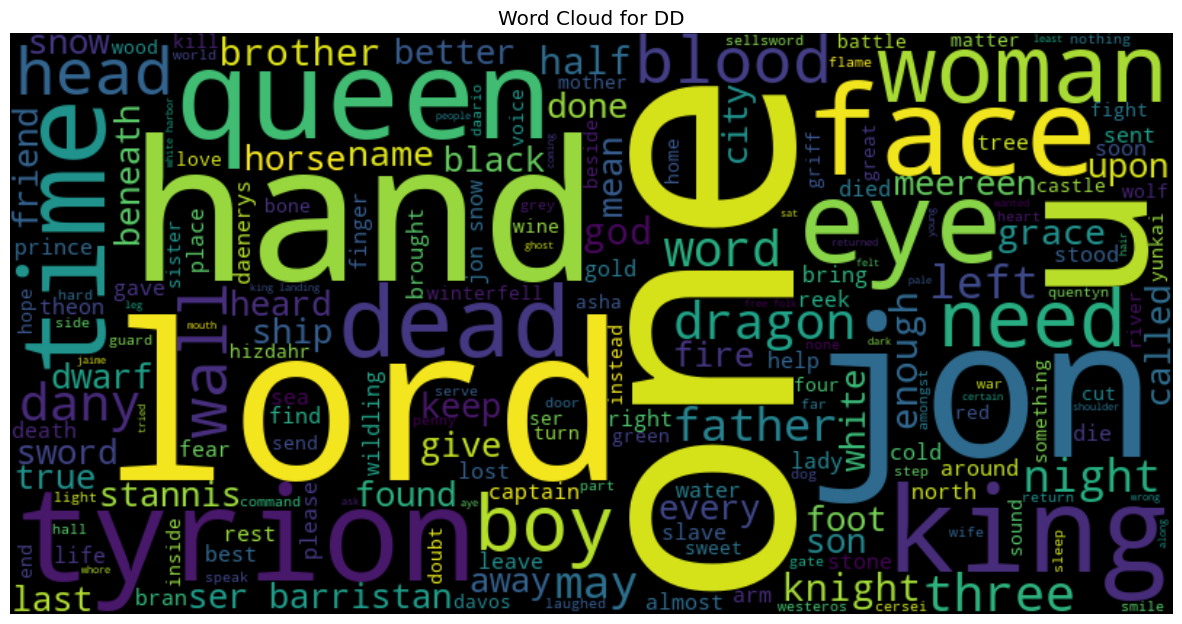

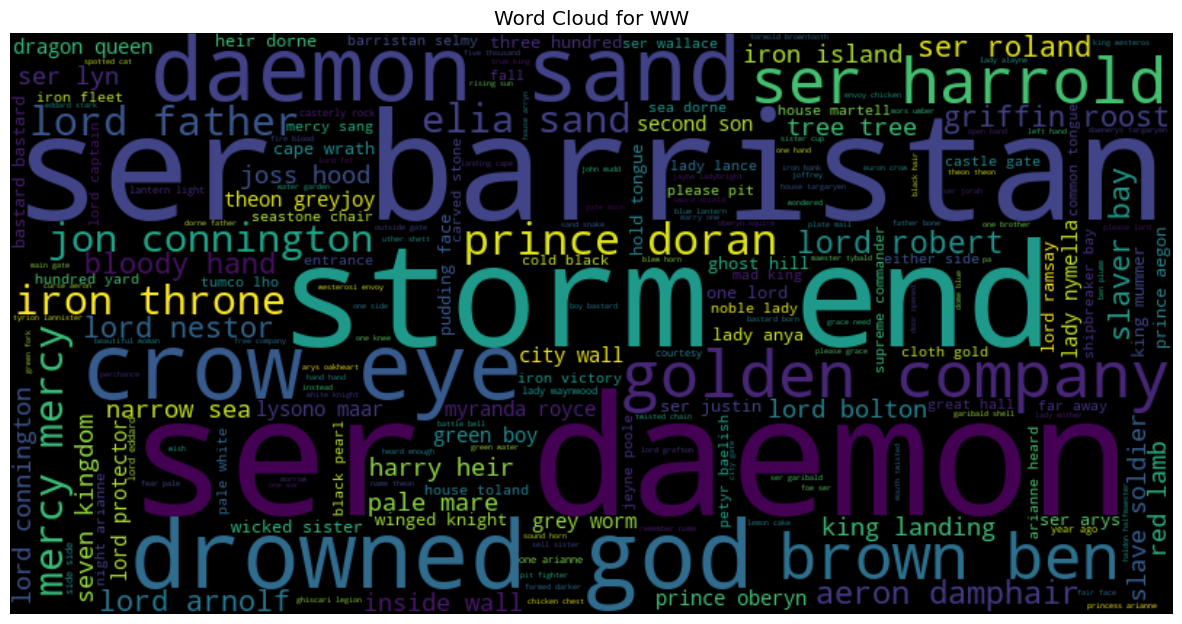

In [22]:
# Extend the stop word list with your custom stop words
custom_stop_words = [ 'let', 'know', 'said', 'cook', 'though', 'made', 'will', 'see', 'come', 'go', 'think', 
    'look', 'want', 'back', 'get', 'asked', 'talk', 'take', 'girl', 'hear', 'well', 'yet', 
    'day', 'never', 'saw', 'perhaps', 'put', 'thing', 'always', 'man', 'even', 'told', 
    'say', 'make', 'must', 'first', 'turned', 'men', 'still', 'good', 'child', 'seemed', 
    'two', 'another', 'behind', 'others', 'tell', 'going', 'new', 'old', 'way', 'looked', 
    'came', 'thought', 'went', 'taken', 'says', 'making', 'gets', 'getting', 'sees', 'seems', 
    'wants', 'talking', 'tells', 'thinks', 'look', 'looking', 'putting', 'asking', 'having', 
    'doing', 'comes', 'going', 'giving', 'takes', 'took', 'gone', 'knew', 'known', 'knows', 
    'seen', 'without', 'within', 'across', 'among', 'between', 'high', 'low', 'big', 'small', 
    'long', 'short', 'little', 'less', 'many', 'much', 'more', 'most', 'other', 'some', 'such', 
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 
    'don', 'should', 'now', 'j', 'sci', 'sci fi', 'might']
stop_words = set(stopwords.words('english')) | set(custom_stop_words)

# Reapplying the preprocessing to each text entry in the dataset
data['separate_book_text'] = data['text'].apply(preprocess_text)


# Generate and display word clouds for each book
book_codes = ['FD','HK', 'FB','GT','CK','SS','FC','DD', 'WW' ]
for book in book_codes:
    book_text = ' '.join(data[data['book'] == book]['separate_book_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(book_text)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {book}')
    plt.show()

In [23]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [24]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize the documents
texts = [word_tokenize(document) for document in data['text']]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Filter out words that occur in less than 20 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Vectorize the documents
corpus = [dictionary.doc2bow(text) for text in texts]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:

# Set training parameters
num_topics = 5  
passes = 10
iterations = 400

# Make a index to word dictionary
temp = dictionary[0]  # This is only to "load" the dictionary
id2word = dictionary.id2token

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, 
                     passes=passes, iterations=iterations, random_state=42)

# Print the topics
topics = lda_model.print_topics(num_words=5)  
for topic in topics:
    print(topic)


(0, '0.016*"could" + 0.011*"jon" + 0.011*"tyrion" + 0.011*"marsh" + 0.011*"dunk"')
(1, '0.023*"ser" + 0.011*"sword" + 0.011*"boy" + 0.009*"white" + 0.009*"could"')
(2, '0.029*"king" + 0.026*"would" + 0.015*"ser" + 0.015*"queen" + 0.014*"lady"')
(3, '0.036*"lord" + 0.030*"one" + 0.014*"like" + 0.013*"night" + 0.010*"wall"')
(4, '0.024*"knight" + 0.017*"face" + 0.015*"lord" + 0.014*"time" + 0.012*"would"')


In [26]:
from gensim import corpora, models

# Function to train LDA model and print topics for a given corpus
def extract_themes(texts, num_topics=5):
    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(texts)
    dictionary.filter_extremes(no_below=20, no_above=0.5)
    
    # Vectorize the documents
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    # Train the LDA model
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, iterations=400, random_state=42)
    
    # Print the topics
    topics = lda_model.print_topics(num_words=5)
    for topic in topics:
        print(topic)

# Iterate through each book and extract themes
for book in data['book'].unique():
    print(f"Themes for {book}:")
    book_texts = [word_tokenize(text) for text in data[data['book'] == book]['text']]
    extract_themes(book_texts, num_topics=5)  
    print("\n")


Themes for FC:
(0, '0.022*"ser" + 0.020*"like" + 0.015*"black" + 0.014*"white" + 0.013*"one"')
(1, '0.016*"night" + 0.015*"ser" + 0.013*"knight" + 0.012*"every" + 0.011*"time"')
(2, '0.016*"need" + 0.016*"head" + 0.016*"god" + 0.014*"grace" + 0.014*"may"')
(3, '0.051*"would" + 0.029*"lord" + 0.018*"father" + 0.018*"one" + 0.018*"king"')
(4, '0.029*"could" + 0.026*"hand" + 0.021*"cersei" + 0.021*"lady" + 0.019*"queen"')


Themes for GT:
(0, '0.033*"father" + 0.020*"head" + 0.016*"blood" + 0.016*"lord" + 0.015*"sansa"')
(1, '0.028*"ned" + 0.027*"hand" + 0.021*"eye" + 0.016*"voice" + 0.014*"arm"')
(2, '0.044*"ser" + 0.032*"would" + 0.013*"dany" + 0.013*"word" + 0.012*"brother"')
(3, '0.024*"one" + 0.022*"could" + 0.021*"jon" + 0.018*"arya" + 0.017*"time"')
(4, '0.053*"lord" + 0.037*"king" + 0.022*"catelyn" + 0.019*"stark" + 0.019*"sword"')


Themes for WW:
(0, '0.019*"god" + 0.016*"battle" + 0.015*"one" + 0.011*"end" + 0.011*"black"')
(1, '0.023*"would" + 0.021*"lady" + 0.016*"face" + 0.0

C:\Users\PC\AppData\Local\Temp\ipykernel_21688\2008628751.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sentence_length'], bins=30, kde=True)


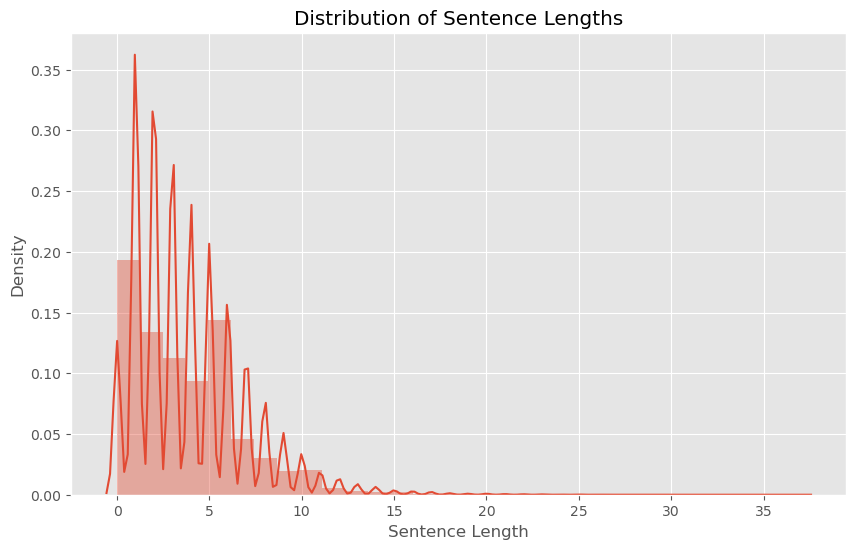

In [27]:
# Calculate sentence length
data['sentence_length'] = data['text'].apply(lambda x: len(x.split()))

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
sns.distplot(data['sentence_length'], bins=30, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Density')
plt.show()



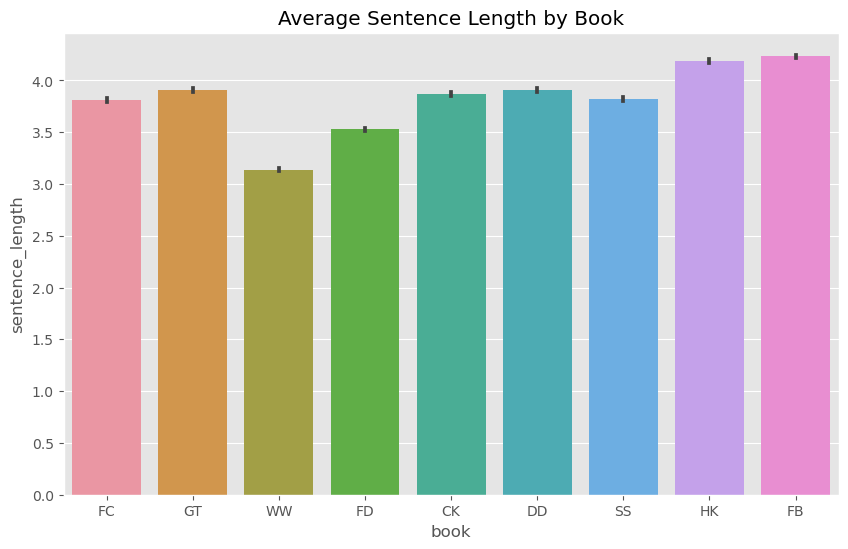

In [28]:
# Average sentence length by book
plt.figure(figsize=(10, 6))
sns.barplot(x='book', y='sentence_length', data=data)
plt.title('Average Sentence Length by Book')
plt.show()


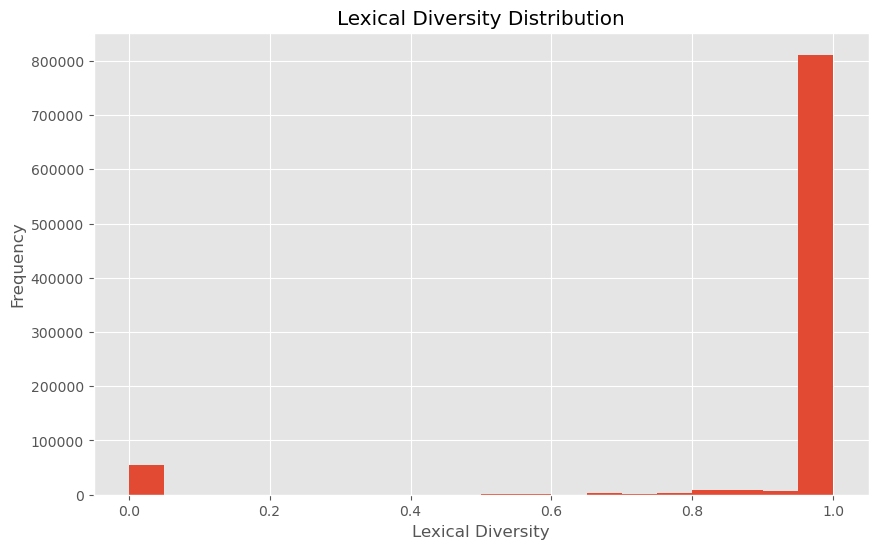

In [29]:
def lexical_diversity(text):
    tokens = text.split()
    if len(tokens) == 0:
        return 0
    return len(set(tokens)) / len(tokens)

data['lexical_diversity'] = data['text'].apply(lexical_diversity)

plt.figure(figsize=(10, 6))
plt.hist(data['lexical_diversity'], bins=20) 
plt.title('Lexical Diversity Distribution')
plt.xlabel('Lexical Diversity')
plt.ylabel('Frequency')
plt.show()



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


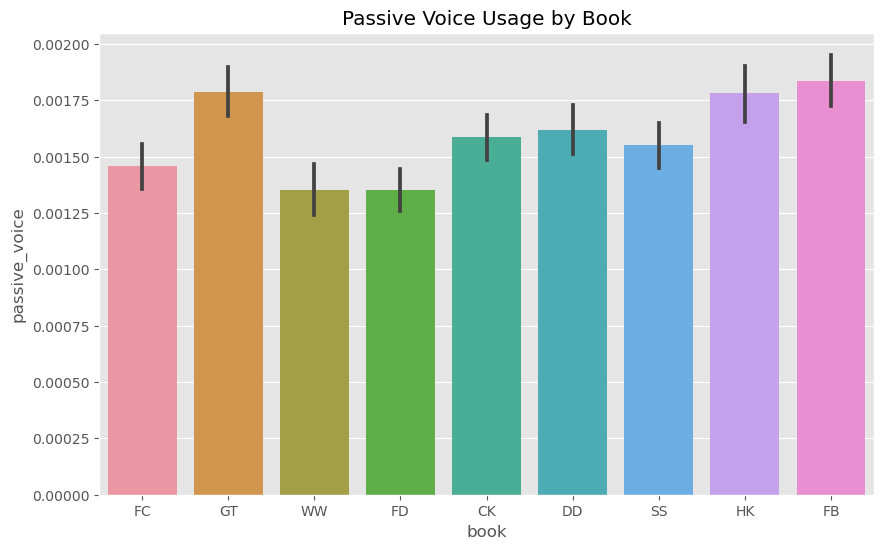

In [30]:
# Passive voice ratio
nltk.download('averaged_perceptron_tagger')
def passive_voice_ratio(text):
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    passive_count = sum(1 for i in range(len(tagged)-2) if tagged[i][1] in ['VBD', 'VBZ', 'VBP', 'VBG', 'VBN'] and tagged[i+1][1] == 'VBN')
    if len(tokens) == 0:
        return 0
    return passive_count / len(tokens)

data['passive_voice'] = data['text'].apply(passive_voice_ratio)

plt.figure(figsize=(10, 6))
sns.barplot(x='book', y='passive_voice', data=data)
plt.title('Passive Voice Usage by Book')
plt.show()


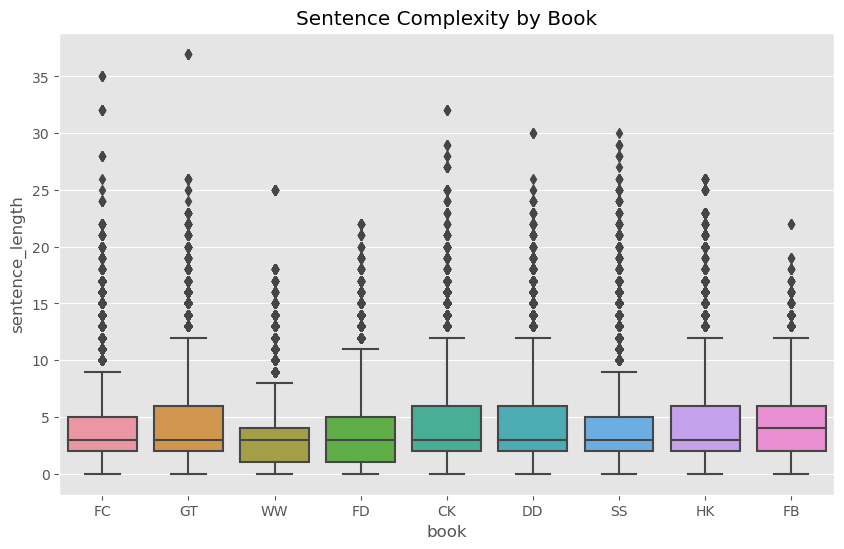

In [31]:
# We already have sentence length. Let's use it to analyze complexity. NR
plt.figure(figsize=(10, 6))
sns.boxplot(x='book', y='sentence_length', data=data)
plt.title('Sentence Complexity by Book')
plt.show()

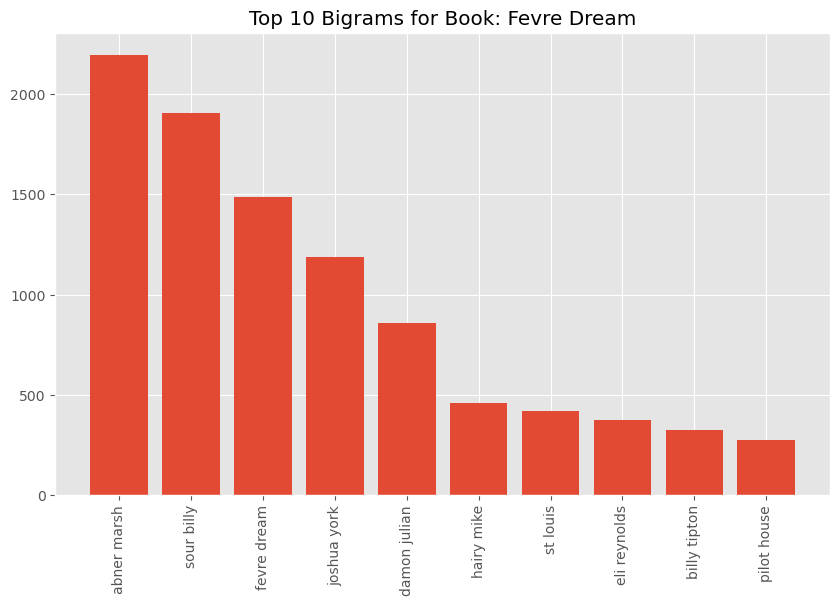

In [32]:
from sklearn.feature_extraction.text import CountVectorizer 


def get_top_ngram(corpus, n=None, ngram=2):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Example for bigrams for FD
top_bigrams = get_top_ngram(data[data['book'] == 'FD']['text'], n=10, ngram=2)  

# Plotting top bigrams for a specific Book
plt.figure(figsize=(10, 6))
x, y = zip(*top_bigrams)
plt.bar(x, y)
plt.title('Top 10 Bigrams for Book: Fevre Dream')
plt.xticks(rotation=90)
plt.show()


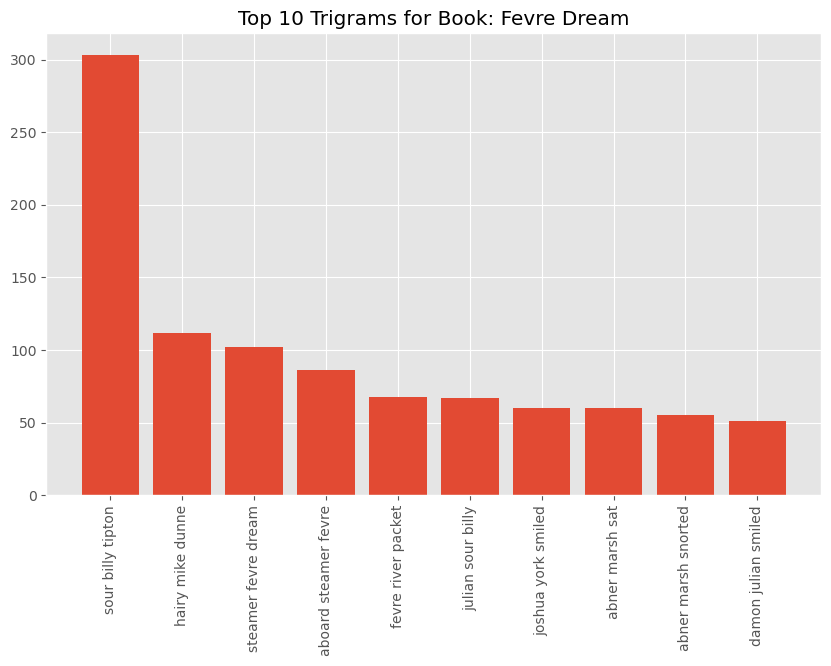

In [33]:
# Example for trigrams
top_bigrams = get_top_ngram(data[data['book'] == 'FD']['text'], n=10, ngram=3) 

# Plotting top bigrams for a specific book
plt.figure(figsize=(10, 6))
x, y = zip(*top_bigrams)
plt.bar(x, y)
plt.title('Top 10 Trigrams for Book: Fevre Dream')
plt.xticks(rotation=90)
plt.show()


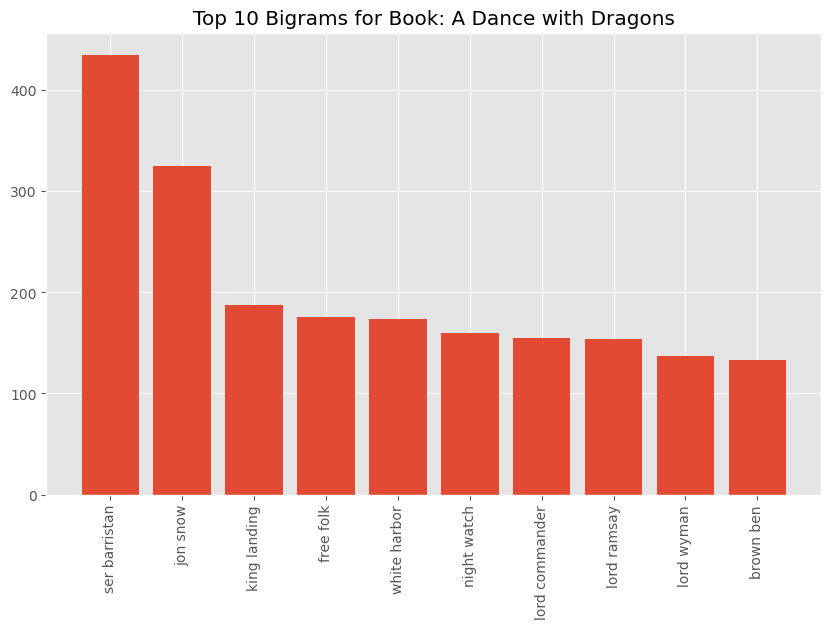

In [34]:
# for bigrams for DD
top_bigrams = get_top_ngram(data[data['book'] == 'DD']['text'], n=10, ngram=2)  

# Plotting top bigrams for a specific book
plt.figure(figsize=(10, 6))
x, y = zip(*top_bigrams)
plt.bar(x, y)
plt.title('Top 10 Bigrams for Book: A Dance with Dragons')
plt.xticks(rotation=90)
plt.show()

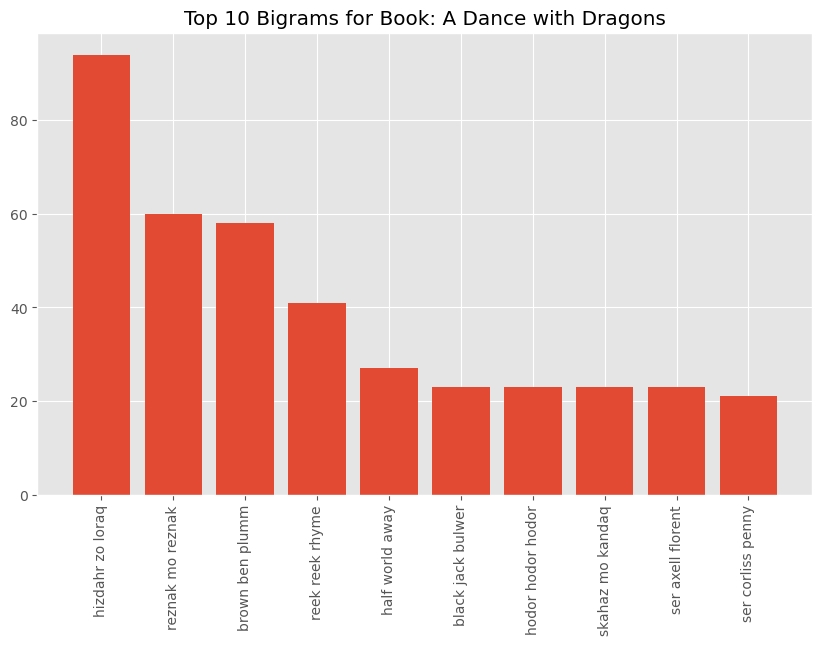

In [35]:
# for Trigrams for DD
top_bigrams = get_top_ngram(data[data['book'] == 'DD']['text'], n=10, ngram=3)  

# Plotting top bigrams for a specific book
plt.figure(figsize=(10, 6))
x, y = zip(*top_bigrams)
plt.bar(x, y)
plt.title('Top 10 Bigrams for Book: A Dance with Dragons')
plt.xticks(rotation=90)
plt.show()

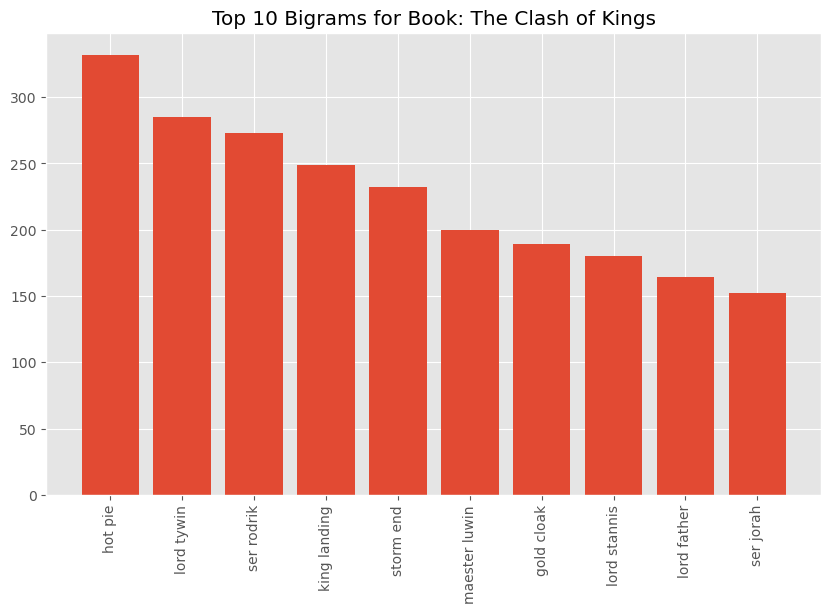

In [36]:
# for bigrams for CK
top_bigrams = get_top_ngram(data[data['book'] == 'CK']['text'], n=10, ngram=2)  

# Plotting top bigrams for a specific book
plt.figure(figsize=(10, 6))
x, y = zip(*top_bigrams)
plt.bar(x, y)
plt.title('Top 10 Bigrams for Book: The Clash of Kings')
plt.xticks(rotation=90)
plt.show()

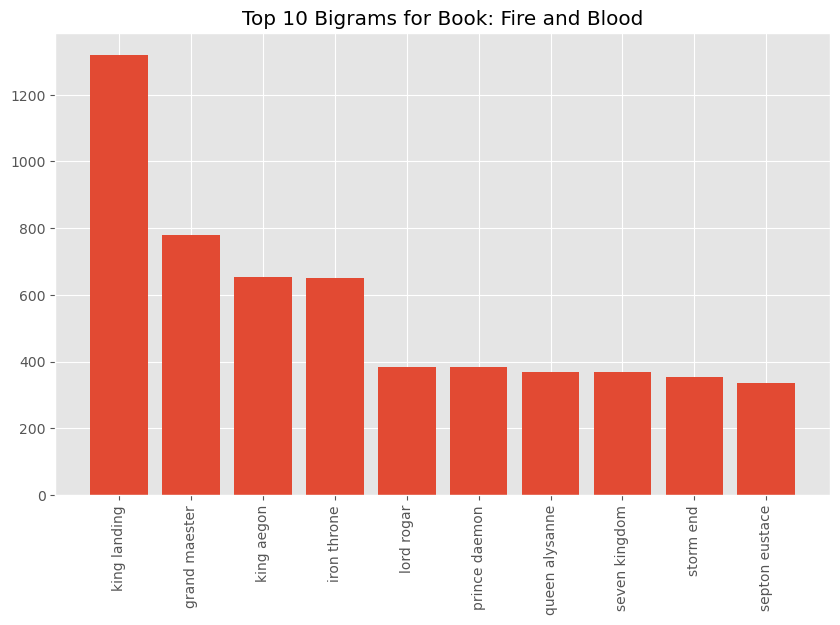

In [37]:
# for bigrams for FB
top_bigrams = get_top_ngram(data[data['book'] == 'FB']['text'], n=10, ngram=2)  

# Plotting top bigrams for a specific Book
plt.figure(figsize=(10, 6))
x, y = zip(*top_bigrams)
plt.bar(x, y)
plt.title('Top 10 Bigrams for Book: Fire and Blood')
plt.xticks(rotation=90)
plt.show()

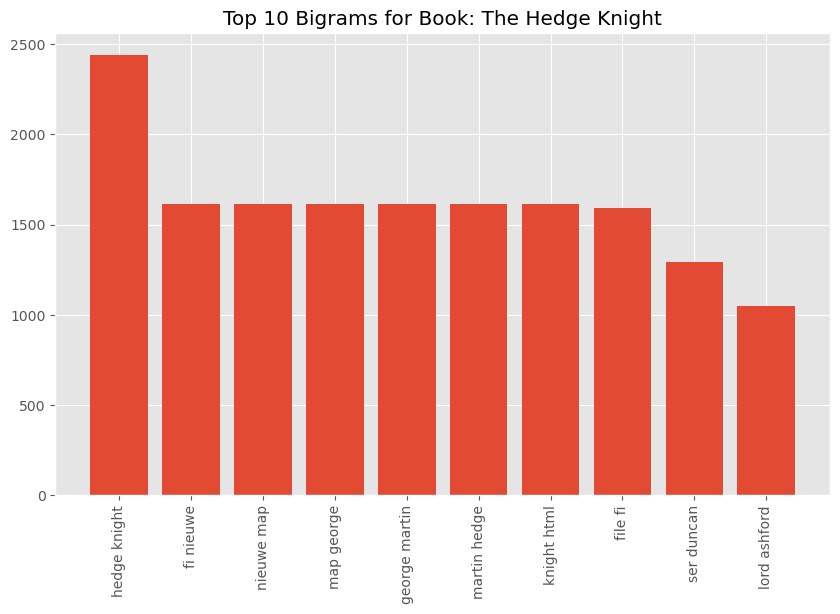

In [38]:
# for bigrams for HK
top_bigrams = get_top_ngram(data[data['book'] == 'HK']['text'], n=10, ngram=2)  

# Plotting top bigrams for a specific book
plt.figure(figsize=(10, 6))
x, y = zip(*top_bigrams)
plt.bar(x, y)
plt.title('Top 10 Bigrams for Book: The Hedge Knight')
plt.xticks(rotation=90)
plt.show()

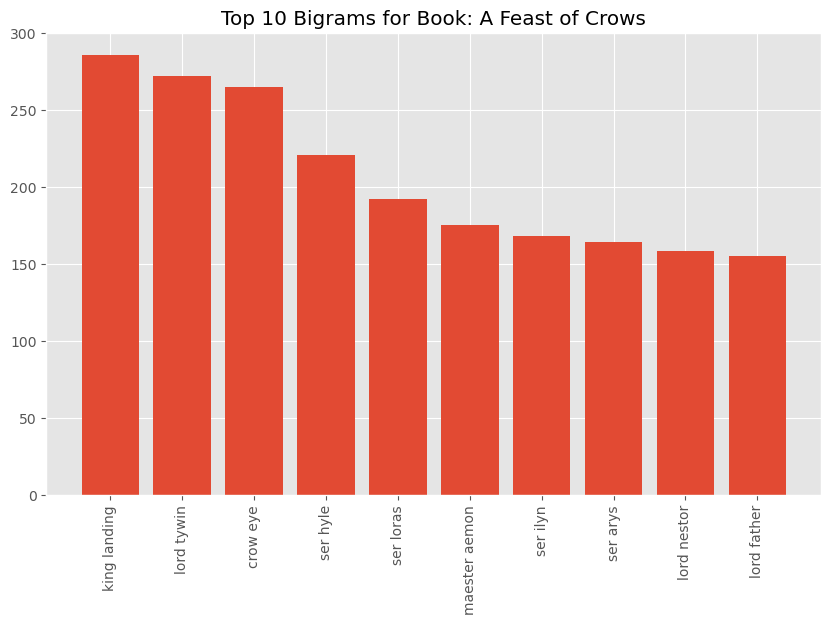

In [39]:
# for bigrams for FC
top_bigrams = get_top_ngram(data[data['book'] == 'FC']['text'], n=10, ngram=2)  

# Plotting top bigrams for a specific book
plt.figure(figsize=(10, 6))
x, y = zip(*top_bigrams)
plt.bar(x, y)
plt.title('Top 10 Bigrams for Book: A Feast of Crows')
plt.xticks(rotation=90)
plt.show()

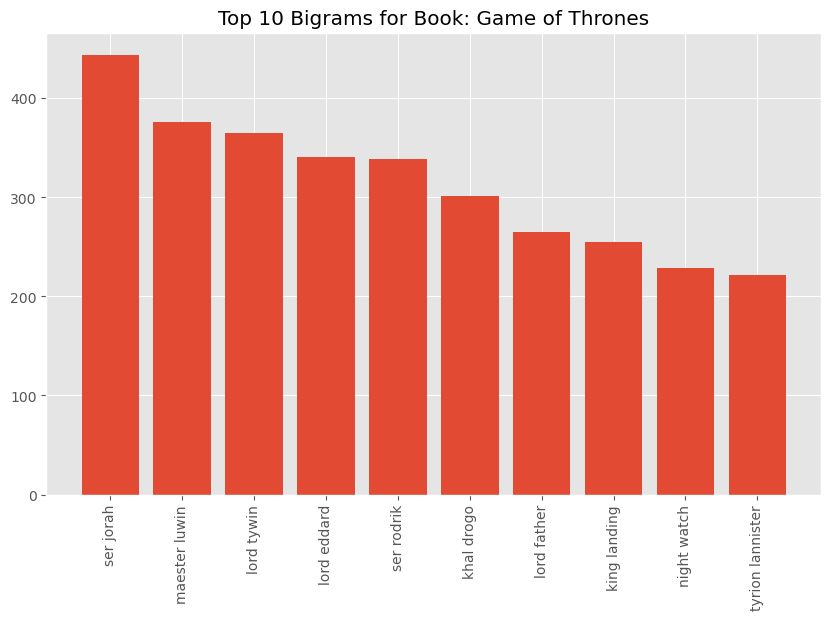

In [40]:
# for bigrams for GT
top_bigrams = get_top_ngram(data[data['book'] == 'GT']['text'], n=10, ngram=2)  

# Plotting top bigrams for a specific book
plt.figure(figsize=(10, 6))
x, y = zip(*top_bigrams)
plt.bar(x, y)
plt.title('Top 10 Bigrams for Book: Game of Thrones')
plt.xticks(rotation=90)
plt.show()

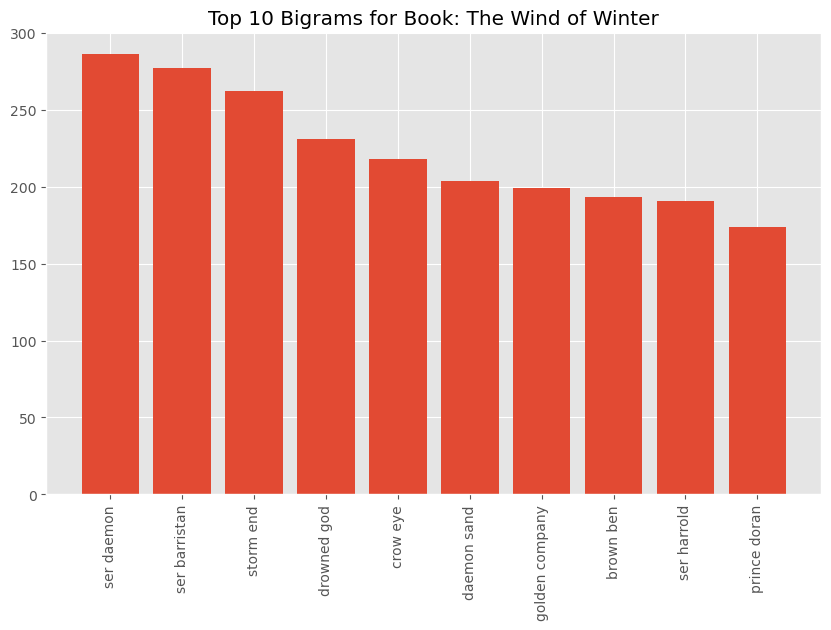

In [41]:
# for bigrams for WW
top_bigrams = get_top_ngram(data[data['book'] == 'WW']['text'], n=10, ngram=2)  

# Plotting top bigrams for a specific book
plt.figure(figsize=(10, 6))
x, y = zip(*top_bigrams)
plt.bar(x, y)
plt.title('Top 10 Bigrams for Book: The Wind of Winter')
plt.xticks(rotation=90)
plt.show()

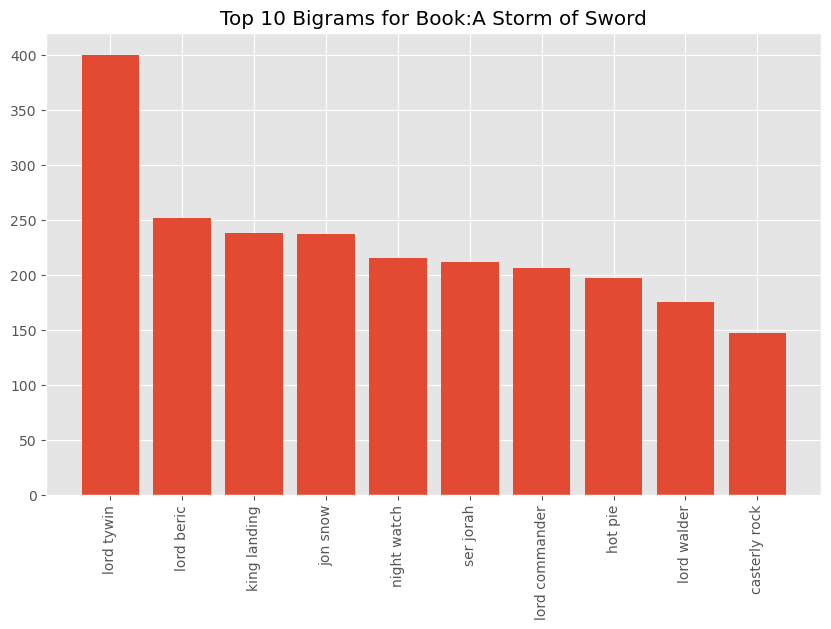

In [42]:
# for bigrams for SS
top_bigrams = get_top_ngram(data[data['book'] == 'SS']['text'], n=10, ngram=2)  

# Plotting top bigrams for a specific book
plt.figure(figsize=(10, 6))
x, y = zip(*top_bigrams)
plt.bar(x, y)
plt.title('Top 10 Bigrams for Book:A Storm of Sword')
plt.xticks(rotation=90)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text'])
y = data['book']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          CK       0.36      0.23      0.28     20252
          DD       0.37      0.27      0.31     19908
          FB       0.54      0.62      0.58     19766
          FC       0.40      0.30      0.34     20133
          FD       0.62      0.69      0.66     20092
          GT       0.39      0.36      0.37     20016
          HK       0.61      0.78      0.69     19925
          SS       0.35      0.22      0.27     19984
          WW       0.33      0.59      0.42     19924

    accuracy                           0.45    180000
   macro avg       0.44      0.45      0.44    180000
weighted avg       0.44      0.45      0.44    180000



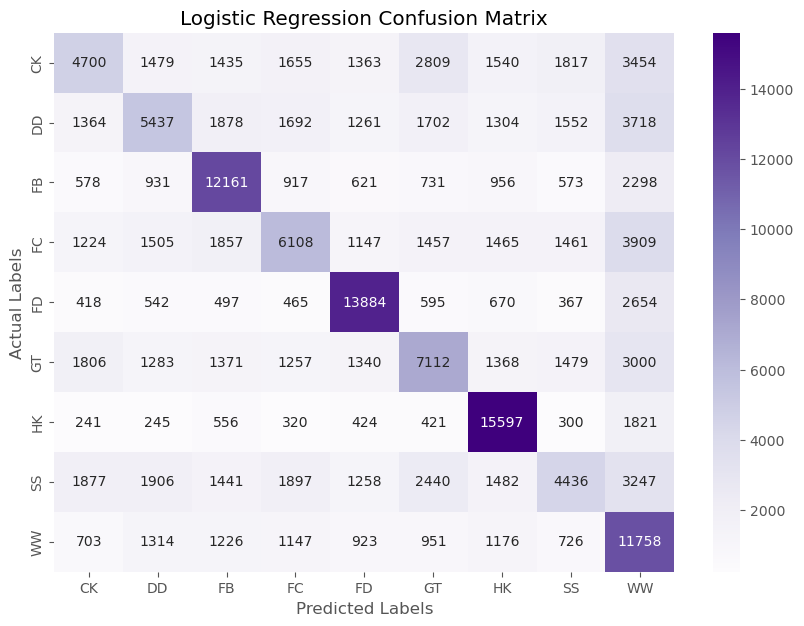

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Generate the confusion matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, y_pred)


# Label encoding classes
label_encoder = LabelEncoder()
label_encoder.fit(y_test)  

# Plotting the heatmap for Logistic Regression
plt.figure(figsize=(10, 7))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap="Purples", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()



In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
nb_predictions = nb_classifier.predict(X_test)

# Print the classification report for Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

          CK       0.36      0.22      0.28     20252
          DD       0.37      0.27      0.31     19908
          FB       0.34      0.68      0.45     19766
          FC       0.39      0.30      0.33     20133
          FD       0.60      0.68      0.64     20092
          GT       0.38      0.35      0.37     20016
          HK       0.57      0.71      0.64     19925
          SS       0.34      0.21      0.26     19984
          WW       0.43      0.45      0.44     19924

    accuracy                           0.43    180000
   macro avg       0.42      0.43      0.41    180000
weighted avg       0.42      0.43      0.41    180000



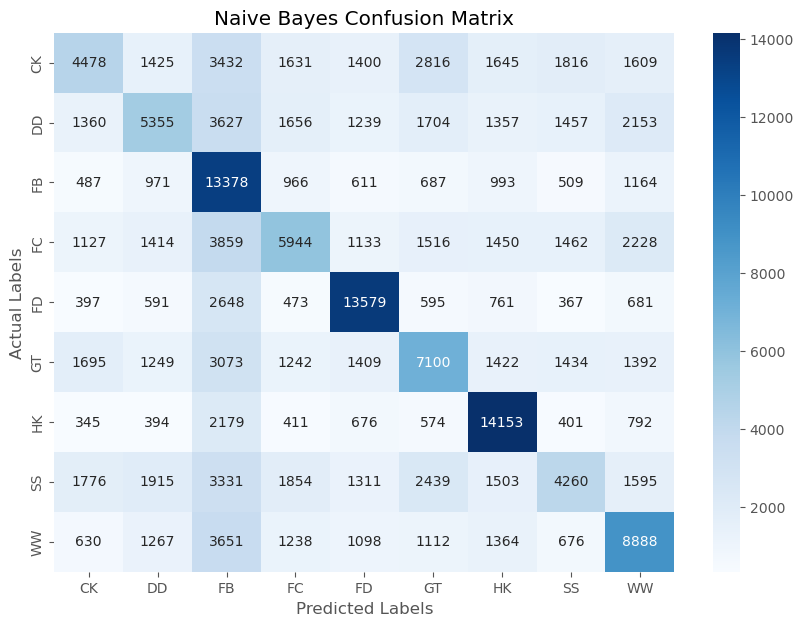

In [46]:
# Generate the confusion matrix for Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)

# Plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [47]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


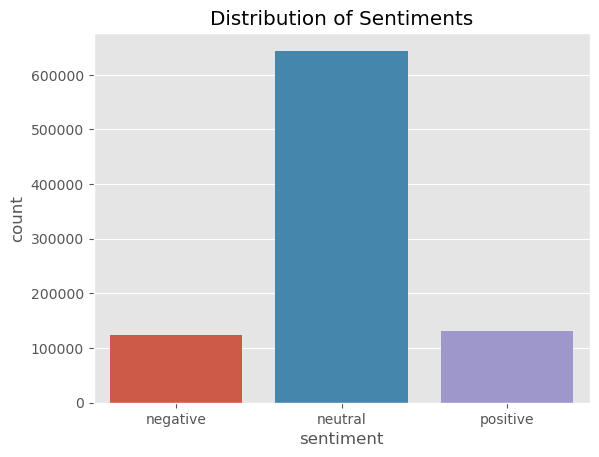

In [48]:
from textblob import TextBlob

# Define a function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to the dataset
data['sentiment'] = data['text'].apply(get_sentiment)

# See the distribution of sentiment
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.show()

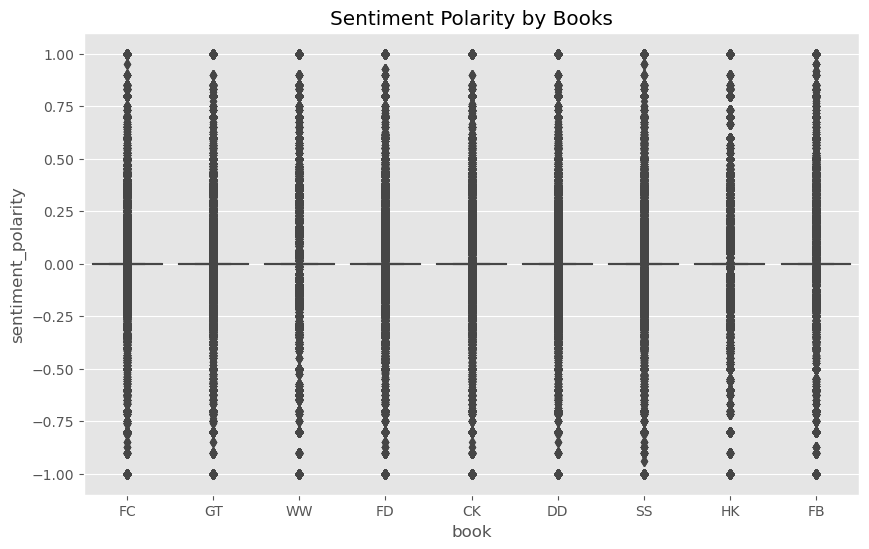

In [49]:

# Function to compute average sentiment polarity
def average_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data['sentiment_polarity'] = data['text'].apply(average_sentiment)

plt.figure(figsize=(10, 6))
sns.boxplot(x='book', y='sentiment_polarity', data=data)
plt.title('Sentiment Polarity by Books')
plt.show()


In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('omw-1.4')


sentiment = SentimentIntensityAnalyzer()

# Apply sentiment analysis and create new columns
data['compound'] = [sentiment.polarity_scores(text)['compound'] for text in data['text']]
data['neg'] = [sentiment.polarity_scores(text)['neg'] for text in data['text']]
data['neu'] = [sentiment.polarity_scores(text)['neu'] for text in data['text']]
data['pos'] = [sentiment.polarity_scores(text)['pos'] for text in data['text']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [51]:
data[['compound', 'neg', 'neu', 'pos' ]].describe()

compound            neg            neu            pos
count  900000.000000  900000.000000  900000.000000  900000.000000
mean        0.006739       0.110401       0.709058       0.119445
std         0.297619       0.234613       0.357942       0.241629
min        -0.973500       0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.435000       0.000000
50%         0.000000       0.000000       1.000000       0.000000
75%         0.000000       0.000000       1.000000       0.000000
max         0.970500       1.000000       1.000000       1.000000

In [52]:
data.head()

text book  text_length  \
0  nonce could merchant pay braavosi usurer due   FC           83   
1                     hard truth one hold tight   GT           42   
2  fierce heat south wore loose trouser mottled   GT           65   
3                                       already   WW           27   
4                             julian broke away   FD           22   

                             separate_book_text  sentence_length  \
0  nonce could merchant pay braavosi usurer due                7   
1                     hard truth one hold tight                5   
2  fierce heat south wore loose trouser mottled                7   
3                                       already                1   
4                             julian broke away                3   

   lexical_diversity  passive_voice sentiment  sentiment_polarity  compound  \
0                1.0            0.0  negative           -0.125000   -0.1027   
1                1.0            0.0  negative           -0.235119    0.2263   
2                1.0            0.0  negative           -0.076923   -0.3182   
3                1.0            0.0   neutral            0.000000    0.0000   
4                1.0            0.0   neutral            0.000000   -0.4215   

     neg    neu    pos  
0  0.189  0.811  0.000  
1  0.209  0.448  0.343  
2  0.277  0.723  0.000  
3  0.000  1.000  0.000  
4  0.583  0.417  0.000

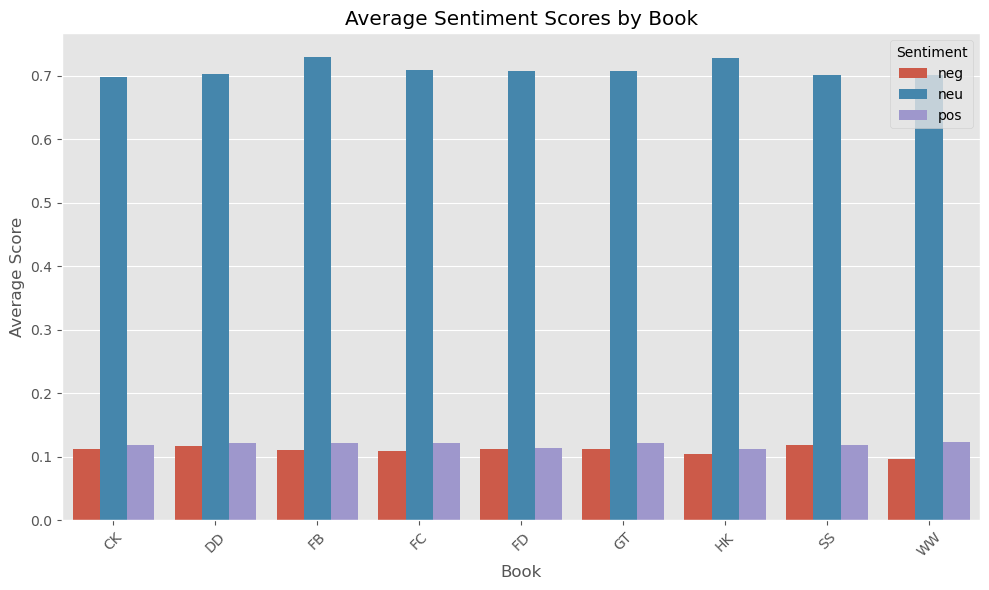

In [53]:
# Group by book and calculate mean sentiment scores
sentiment_by_book = data.groupby('book').agg({'neg': 'mean', 'neu': 'mean', 'pos': 'mean'}).reset_index()

# Melting the DataFrame to make it suitable for seaborn's barplot
sentiment_melted = pd.melt(sentiment_by_book, id_vars=['book'], value_vars=['neg', 'neu', 'pos'], var_name='Sentiment', value_name='Score')

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='book', y='Score', hue='Sentiment', data=sentiment_melted)
plt.xticks(rotation=45)
plt.title('Average Sentiment Scores by Book')
plt.ylabel('Average Score')
plt.xlabel('Book')
plt.tight_layout()
plt.show()


<Axes: xlabel='compound', ylabel='Count'>

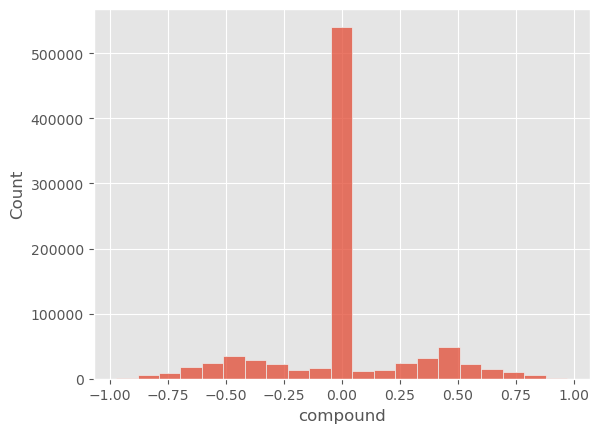

In [54]:
sns.histplot(data['compound'])

<Axes: xlabel='pos', ylabel='Count'>

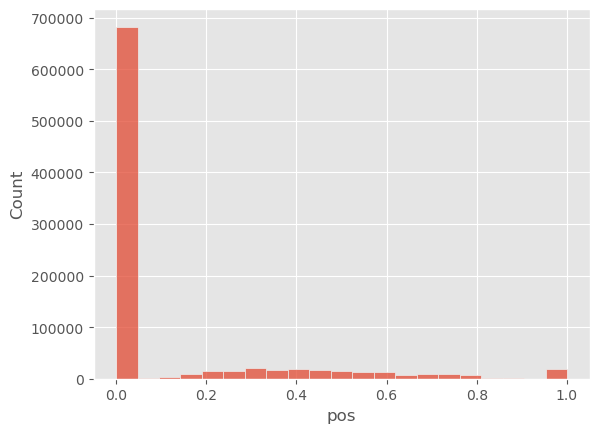

In [55]:
sns.histplot(data['pos'])

<Axes: xlabel='neg', ylabel='Count'>

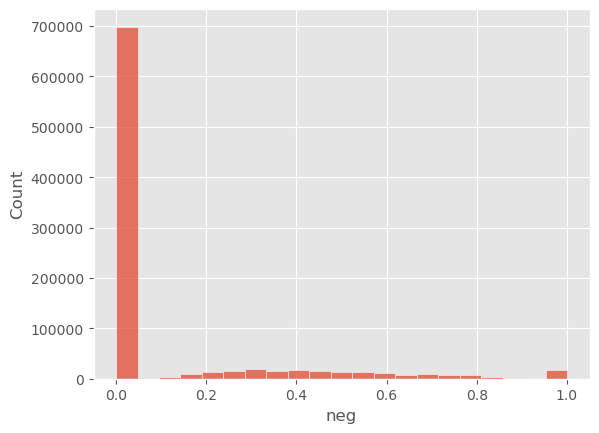

In [56]:
sns.histplot(data['neg'])

<Axes: xlabel='neu', ylabel='Count'>

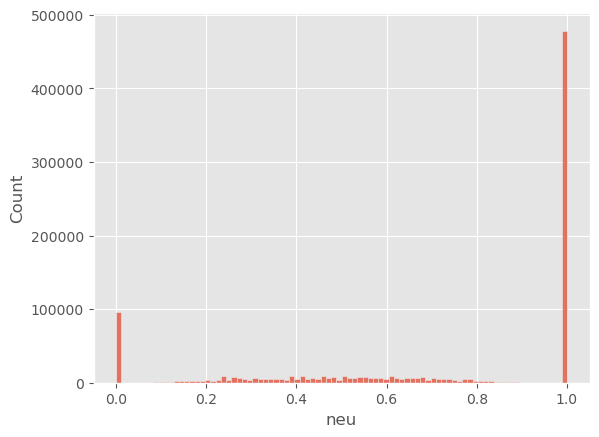

In [57]:
sns.histplot(data['neu'])

In [58]:
(data['compound']<=0).groupby(data['book']).sum()

book
CK    79096
DD    78476
FB    76875
FC    78961
FD    80186
GT    78281
HK    78781
SS    79058
WW    80181
Name: compound, dtype: int64

In [59]:

# Calculate the percentage of 'pos' and 'neg' sentiments that are greater than a threshold (e.g., 0.05 for 'pos' and 'neg')

data['pos_flag'] = data['pos'] > 0.05  # Flag rows with positive sentiment above threshold
data['neg_flag'] = data['neg'] > 0.05  # Flag rows with negative sentiment above threshold

# Group by book and calculate the sum of flags for 'pos' and 'neg'
sentiment_flags_sum = data.groupby('book').agg({'pos_flag': 'sum', 'neg_flag': 'sum'}).reset_index()

# Calculate the total number of sentiments per book for normalization
sentiment_flags_sum['total'] = data.groupby('book')['text'].count().values

# Calculate the percentage of 'pos' and 'neg' sentiments for each book
sentiment_flags_sum['percent_pos'] = (sentiment_flags_sum['pos_flag'] / sentiment_flags_sum['total']) * 100
sentiment_flags_sum['percent_neg'] = (sentiment_flags_sum['neg_flag'] / sentiment_flags_sum['total']) * 100

# Select and display relevant columns
percentage_flags = sentiment_flags_sum[['book', 'percent_pos', 'percent_neg']]
percentage_flags


book  percent_pos  percent_neg
0   CK       24.102       22.701
1   DD       24.904       23.406
2   FB       26.251       23.440
3   FC       24.291       21.989
4   FD       22.687       21.671
5   GT       24.911       23.120
6   HK       23.698       23.300
7   SS       24.117       23.716
8   WW       22.305       17.980